In [1]:
%%html
<marquee style='width: 30%; color: yellow;'><b>Random-Forest-to-Predict-Font-Labels</b></marquee>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Preliminary Data Processing**#
**Data set G = same 4 fonts used in KNN: 4 Classes CL1 CL2 CL3 CL4**


In [ ]:
df_bodoni=pd.read_csv('/content/drive/MyDrive/KNN_font/BODONI.csv',delimiter=',')
df_eras=pd.read_csv('/content/drive/MyDrive/KNN_font/ERAS.csv',delimiter=',')
df_gabriola=pd.read_csv('/content/drive/MyDrive/KNN_font/GABRIOLA.csv',delimiter=',')
df_technic=pd.read_csv('/content/drive/MyDrive/KNN_font/TECHNIC.csv',delimiter=',')

In [ ]:
print(df_bodoni.shape,df_eras.shape,df_gabriola.shape,df_technic.shape)

(3964, 412) (3904, 412) (3512, 412) (5520, 412)


In [ ]:
df_bodoni

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,h,w,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,BODONI,BODONI MT POSTER COMPRESSED,64258,0.4,0,0.0,33,20,49,20,20,20,1,1,1,1,1,47,47,151,209,105,105,105,255,255,255,255,255,255,1,1,1,1,1,1,94,255,255,58,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
1,BODONI,BODONI MT POSTER COMPRESSED,64257,0.4,0,0.0,33,20,49,20,20,20,1,1,1,1,1,1,47,151,151,209,105,105,105,105,105,151,151,47,1,1,1,1,1,1,94,198,255,162,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
2,BODONI,BODONI MT POSTER COMPRESSED,9674,0.4,0,0.0,33,22,49,29,20,20,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,146,255,255,146,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1
3,BODONI,BODONI MT POSTER COMPRESSED,8805,0.4,0,0.0,40,24,33,25,20,20,255,194,101,21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,255,255,212,171,47,19,1,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,BODONI,BODONI MT POSTER COMPRESSED,8804,0.4,0,0.0,40,24,33,25,20,20,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21,101,194,255,1,1,1,1,1,1,1,1,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,BODONI,BODONI MT,37,0.7,1,0.0,36,30,48,46,20,20,1,1,36,154,246,213,247,131,12,1,1,1,1,1,1,1,2,126,255,172,1,87,244,255,163,1,233,255,...,9,160,255,132,1,1,1,1,1,1,1,104,255,233,1,163,255,217,87,1,172,255,126,2,1,1,1,1,1,1,1,12,131,247,213,246,154,17,1,1
3960,BODONI,BODONI MT,36,0.7,1,0.0,36,22,53,33,20,20,1,1,1,1,1,1,1,1,1,1,62,255,31,1,1,217,93,1,1,1,1,1,1,1,1,1,10,41,...,1,1,1,1,39,255,16,1,1,232,78,1,1,1,1,1,1,1,1,1,1,1,1,1,156,151,4,1,100,191,19,1,1,1,1,1,1,1,1,1
3961,BODONI,BODONI MT,35,0.7,1,0.0,36,25,46,40,20,20,1,1,1,1,1,1,145,255,255,111,1,1,1,1,1,200,255,255,111,1,1,1,1,1,1,1,255,255,...,1,1,255,255,255,1,1,1,1,1,1,255,255,255,1,1,1,1,1,1,1,111,255,255,145,1,1,1,1,1,111,255,255,145,1,1,1,1,1,1
3962,BODONI,BODONI MT,34,0.7,1,0.0,36,32,22,25,20,20,1,1,14,24,255,255,255,70,1,1,1,1,1,10,24,209,255,255,116,5,1,19,172,255,255,255,255,255,...,255,255,103,1,1,1,1,1,1,1,1,205,255,154,1,1,1,1,1,1,255,163,10,1,1,1,1,1,1,1,1,205,209,14,1,1,1,1,1,1


KEEP the 3 columns {font, strength, italic}
KEEP also the 400 columns named r0c0, r0c1,r0c2, ... , r19c18, r19c19 any row containing missing numerical data should be be discarded

In [ ]:
#KEEP the 3 columns {font, strength, italic}
df_CL1 = df_bodoni.iloc[:, [0]+ [3] + [4] + list(np.arange(12,412))].dropna()
df_CL2 = df_eras.iloc[:, [0]+ [3] + [4] + list(np.arange(12,412))].dropna()
df_CL3 = df_gabriola.iloc[:, [0]+ [3] + [4] + list(np.arange(12,412))].dropna()
df_CL4 = df_technic.iloc[:, [0]+ [3] + [4] + list(np.arange(12,412))].dropna()

Define then four CLASSES CL1 CL2 CL3 CL4 of images of "normal" characters as follows CLj = all rows of FONTj.csv for the only cases kept are **(not italic - italic= 0 & not bold - strength= 0.4)**\
N cases , 400 features X1(n) … X400(n) per case “n”

In [ ]:
#the "normal" character data frames are denoted by _n
df_CL1_n = df_CL1[(df_CL1['strength']==0.4) & (df_CL1['italic']==0)].drop(columns=['font','strength','italic'])
df_CL2_n = df_CL2[(df_CL2['strength']==0.4) & (df_CL2['italic']==0)].drop(columns=['font','strength','italic'])
df_CL3_n = df_CL3[(df_CL3['strength']==0.4) & (df_CL3['italic']==0)].drop(columns=['font','strength','italic'])
df_CL4_n = df_CL4[(df_CL4['strength']==0.4) & (df_CL4['italic']==0)].drop(columns=['font','strength','italic'])

In [ ]:
#check "normal" data shapes and balance
print(df_CL1_n.shape,df_CL2_n.shape,df_CL3_n.shape,df_CL4_n.shape)


(991, 400) (976, 400) (878, 400) (1380, 400)


In [ ]:
size_cl1=len(df_CL1_n)
size_cl2=len(df_CL2_n)
size_cl3=len(df_CL3_n)
size_cl4=len(df_CL4_n)
size_total=size_cl1+size_cl2+size_cl3+size_cl4
perc_cl1=len(df_CL1_n)/size_total*100
perc_cl2=len(df_CL2_n)/size_total*100
perc_cl3=len(df_CL3_n)/size_total*100
perc_cl4=len(df_CL4_n)/size_total*100
cl_size=[size_cl1,size_cl2,size_cl3,size_cl4]
cl_perc=np.around([perc_cl1,perc_cl2,perc_cl3,perc_cl4],decimals=1)
cl_list=zip(cl_size,cl_perc)

In [ ]:
cl_table=pd.DataFrame(cl_list,columns=['Size of Class','Percentage of Class'],index =['CL1', 'CL2', 'CL3', 'CL4'])
cl_table

,Size of Class,Percentage of Class
CL1,991,23.5
CL2,976,23.1
CL3,878,20.8
CL4,1380,32.7


In [ ]:
DATA = pd.concat([df_CL1_n, df_CL2_n, df_CL3_n, df_CL4_n], ignore_index=True)
DATA.head()
# This data set before PCA has 400 features. We will perform PCA to only keep r features to work for this homework 3.

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,1,1,47,47,151,209,105,105,105,255,255,255,255,255,255,1,1,1,1,1,1,94,255,255,58,1,1,1,198,255,255,255,255,255,255,1,1,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
1,1,1,1,1,1,1,47,151,151,209,105,105,105,105,105,151,151,47,1,1,1,1,1,1,94,198,255,162,58,1,1,1,1,94,198,255,255,255,198,1,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
2,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,146,255,255,146,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,146,255,255,146,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1
3,255,194,101,21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,255,255,212,171,47,19,1,1,1,1,1,1,1,1,1,1,1,1,1,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21,101,194,255,1,1,1,1,1,1,1,1,1,1,1,1,1,19,47,171,212,255,255,218,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [ ]:
from sklearn.decomposition import PCA
pca_data=PCA(0.9).fit(DATA)
z=pca_data.transform(DATA)
ZDATA=pd.DataFrame(z)
ZDATA.shape

(4225, 61)

In [ ]:
#Generate TRUC data series corresponding to CLk
TRUC_1=(df_CL1_n.iloc[:,1]*0+1).to_numpy();
TRUC_2=(df_CL2_n.iloc[:,1]*0+2).to_numpy();
TRUC_3=(df_CL3_n.iloc[:,1]*0+3).to_numpy();
TRUC_4=(df_CL4_n.iloc[:,1]*0+4).to_numpy()
TRUC=np.concatenate([TRUC_1,TRUC_2,TRUC_3,TRUC_4])

In [ ]:
ZDATA['TRUC']=TRUC

In [ ]:
# This ZDATA includes 4 fonts with only 61 features after performing PCA. ZDATA is comsidered as big data set that we need to work on.
# Also, we need split this big data ZDATA into 4 groups ZCL1, ZCL2, ZCL3, ZCL4 for small group analysis purposes.

ZCL1 = ZDATA[ZDATA['TRUC']==1]
ZCL2 = ZDATA[ZDATA['TRUC']==2]
ZCL3 = ZDATA[ZDATA['TRUC']==3]
ZCL4 = ZDATA[ZDATA['TRUC']==4]

In [ ]:
ZCL2.shape

(976, 62)

In [ ]:
TRUC_2.shape

(976,)

#**1. Rebalancing data by SMOTE**#

**1.1 For classes CL1 … CL4 display Sj = CLj ), perc (j) = Sj /N**

In [ ]:
#calculate Sj = size(CLj)
size_cl1 = len(ZCL1)
size_cl2 = len(ZCL2)
size_cl3 = len(ZCL3)
size_cl4 = len(ZCL4)
print('Size CL1 (bodoni data set) is:', size_cl1)
print('Size CL2 (eras data set) is:', size_cl2)
print('Size CL3 (gabriola data set) is:', size_cl3)
print('Size CL4 (technic data set) is:', size_cl4)

Size CL1 (bodoni data set) is: 991
Size CL2 (eras data set) is: 976
Size CL3 (gabriola data set) is: 878
Size CL4 (technic data set) is: 1380


In [ ]:
#perc(j) = Sj/N
size_total = size_cl1 + size_cl2 + size_cl3 + size_cl4
pca_perc_cl1 = np.around(size_cl1/size_total*100,decimals=1)
pca_perc_cl2 = np.around(size_cl2/size_total*100,decimals=1)
pca_perc_cl3 = np.around(size_cl3/size_total*100,decimals=1)
pca_perc_cl4 = np.around(size_cl4/size_total*100,decimals=1)
print('Perc CL1 (bodoni data set) is:',pca_perc_cl1)
print('Perc CL2 (eras data set) is:', pca_perc_cl2)
print('Perc CL3 (gabriola data set) is:', pca_perc_cl3)
print('Perc CL4 (technic data set) is:', pca_perc_cl4)

Perc CL1 (bodoni data set) is: 23.5
Perc CL2 (eras data set) is: 23.1
Perc CL3 (gabriola data set) is: 20.8
Perc CL4 (technic data set) is: 32.7


In [ ]:
pca_cl_size=[size_cl1,size_cl2,size_cl3,size_cl4]
pca_cl_perc=[pca_perc_cl1,pca_perc_cl2,pca_perc_cl3,pca_perc_cl4]
pca_cl_list=zip(pca_cl_size,pca_cl_perc)

In [ ]:
pca_cl_table=pd.DataFrame(pca_cl_list,columns=['Size of Class','Percentage of Class'],index =['CL1', 'CL2', 'CL3', 'CL4'])
pca_cl_table

,Size of Class,Percentage of Class
CL1,991,23.5
CL2,976,23.1
CL3,878,20.8
CL4,1380,32.7


**Comment:**
\
With the result for size and percentage of each CLj above, we can tell that CL4 takes a large portion of our project. To avoid the bias, we will increase the size of other 3 CLs after split training sets and test sets. 

####**1.2 Select a training set and a test set (80%/20%) in each class**####


In [ ]:
#split train and test data on each CL to ensure each class data is equally splited
from sklearn.model_selection import train_test_split
x1_train_ori, x1_test_ori, y1_train_ori, y1_test_ori = train_test_split(ZCL1.iloc[:,0:61], TRUC_1, test_size=0.2,random_state=5)
x2_train_ori, x2_test_ori, y2_train_ori, y2_test_ori = train_test_split(ZCL2.iloc[:,0:61], TRUC_2, test_size=0.2,random_state=5)
x3_train_ori, x3_test_ori, y3_train_ori, y3_test_ori = train_test_split(ZCL3.iloc[:,0:61], TRUC_3, test_size=0.2,random_state=5)
x4_train_ori, x4_test_ori, y4_train_ori, y4_test_ori = train_test_split(ZCL4.iloc[:,0:61], TRUC_4, test_size=0.2,random_state=5)

In [ ]:
#Compare again the shape of 4 training sets we are about to work with
print (x1_train_ori.shape, x2_train_ori.shape, x3_train_ori.shape, x4_train_ori.shape)

(792, 61) (780, 61) (702, 61) (1104, 61)


In [ ]:
print (x1_test_ori.shape, x2_test_ori.shape, x3_test_ori.shape, x4_test_ori.shape)

(199, 61) (196, 61) (176, 61) (276, 61)


In [ ]:
print (y1_train_ori.shape, y2_train_ori.shape, y3_train_ori.shape, y4_train_ori.shape)

(792,) (780,) (702,) (1104,)


In [ ]:
print (y1_test_ori.shape, y2_test_ori.shape, y3_test_ori.shape, y4_test_ori.shape)

(199,) (196,) (176,) (276,)


**Comment:**\
x1_train_ori takes (792/ (792 + 780 + 702 + 1104)) = 23%\
x2_train_ori takes 23%\
x3_train_ori takes 21%\
x4_train_ori takes 33%\
**This suggests the same thing as 1.1. We will be cloning 3 CLs to increase the size for analysis purpose.**

####**1.3 If the smallest percentages perc (j) is too far from 25% , like of the order of 17% or less, then increase the size of CLj by perturbed cloning (or by SMOTE). This creation of virtual cases must be done separately for the CLj training cases and for the CLj testing cases.**####


In [ ]:
# Grouping Training set and testing set
x_train_ori=pd.concat([x1_train_ori,x2_train_ori,x3_train_ori,x4_train_ori],axis=0).to_numpy()
x_test_ori=pd.concat([x1_test_ori,x2_test_ori,x3_test_ori,x4_test_ori],axis=0).to_numpy()
y_train_ori=np.concatenate((y1_train_ori,y2_train_ori,y3_train_ori,y4_train_ori),axis=0)
y_test_ori=np.concatenate((y1_test_ori,y2_test_ori,y3_test_ori,y4_test_ori),axis=0)

In [ ]:
# Import SMOTE function
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Perform SMOTE for training set
X_sm_train, y_sm_train = sm.fit_resample(x_train_ori, y_train_ori)

print(f'''Shape of X_train before SMOTE: {x_train_ori.shape}
Shape of X_train after SMOTE: {X_sm_train.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm_train_df = pd.DataFrame(y_sm_train)
y_sm_train_df.value_counts(normalize = True) * 100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of X_train before SMOTE: (3378, 61)
Shape of X_train after SMOTE: (4416, 61)

Balance of positive and negative classes (%):


4    25.0
3    25.0
2    25.0
1    25.0
dtype: float64

In [ ]:
# Perform SMOTE for test set
X_sm_test, y_sm_test = sm.fit_resample(x_test_ori, y_test_ori)

print(f'''Shape of X_test before SMOTE: {x_test_ori.shape}
Shape of X_test after SMOTE: {X_sm_test.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm_test_df = pd.DataFrame(y_sm_test)
y_sm_test_df.value_counts(normalize = True) * 100

Shape of X_test before SMOTE: (847, 61)
Shape of X_test after SMOTE: (1104, 61)

Balance of positive and negative classes (%):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


4    25.0
3    25.0
2    25.0
1    25.0
dtype: float64

**Comments:**\
This SMOTE function increased CL1, CL2 and CL3 cases number to match with CL4, which has most cases, and did not drop a case. Here the SMOTE function was applied on training and testing data seprately, to ensure there are same percentage of "clone" data in training and testing dataset.   
Eventually, the classes case quantities are perfectly balanced with 25% : 25% : 25% : 25%.

In [ ]:
#Generate the full training set TRAIN as the union of the four trainCLj for j=1,2,3,4. 
#Generate the full test set TEST as the union of the four testCLj.
#Rename smote data as _train and _test for follow the friendly naming convention
x_train=X_sm_train
x_test=X_sm_test

y_train=y_sm_train
y_test=y_sm_test

print('x_train shape is',x_train.shape,'x_test shape is',x_test.shape)

x_train shape is (4416, 61) x_test shape is (1104, 61)


**Comments:**\
From the results above, you can see that the shape of data set increases from 4225 to 5520, due to over sampling. The classes balance is perfect now with 25% : 25% : 25% : 25%.

####**1.4 regroup then all training sets across classes, and all testing sets across classes**####

In [ ]:
# Since SMOTE was done on train and test data separately, there is no need to regroup data and re-split again. Just because required.
# Combine X_sm_train, X_sm_test, y_sm_train, y_sm_test for big data
x_new=np.concatenate((x_train,x_test),axis=0)
y_new=np.concatenate((y_train,y_test),axis=0)

DATA_new = pd.DataFrame(x_new)
DATA_new['TRUC']= y_new
DATA_new.shape

(5520, 62)

In [ ]:
# New CLi after SMOTE
nCL1 = DATA_new[DATA_new['TRUC']==1]
nCL2 = DATA_new[DATA_new['TRUC']==2]
nCL3 = DATA_new[DATA_new['TRUC']==3]
nCL4 = DATA_new[DATA_new['TRUC']==4]

In [ ]:
# new training sets and test sets after SMOKE
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(nCL1.iloc[:,0:61], nCL1.iloc[:,61], test_size=0.2,random_state=5)
x2_train, x2_test, y2_train, y2_test = train_test_split(nCL2.iloc[:,0:61], nCL2.iloc[:,61], test_size=0.2,random_state=5)
x3_train, x3_test, y3_train, y3_test = train_test_split(nCL3.iloc[:,0:61], nCL3.iloc[:,61], test_size=0.2,random_state=5)
x4_train, x4_test, y4_train, y4_test = train_test_split(nCL4.iloc[:,0:61], nCL4.iloc[:,61], test_size=0.2,random_state=5)

In [ ]:
print (x1_train.shape, x2_train.shape, x3_train.shape, x4_train.shape)

(1104, 61) (1104, 61) (1104, 61) (1104, 61)


In [ ]:
#Generate the full training set TRAIN as the union of the four trainCLj for j=1,2,3,4. 
#Generate the full test set TEST as the union of the four testCLj.
x_train=pd.concat([x1_train,x2_train,x3_train,x4_train],axis=0).to_numpy()
x_test=pd.concat([x1_test,x2_test,x3_test,x4_test],axis=0).to_numpy()

y_train=np.concatenate([y1_train,y2_train,y3_train,y4_train])
y_test=np.concatenate([y1_test,y2_test,y3_test,y4_test])

print('x_train shape is',x_train.shape,'x_test shape is',x_test.shape)

x_train shape is (4416, 61) x_test shape is (1104, 61)


#**2. Present the function of Random Forest**#

####**2.1 Outline algorithmic principles for basic Random Forest (RF).**###

Random Forests (RF) use trees as building blocks to construct a powerful prediction model. It consists of a large number of decision trees that can be applied to both regression and classification problems.\
\
For a regression tree, the predicted response for an observation is given by the mean response of the training observations that belong to the same terminal node. For a classification tree, each observation is predicted that it belongs to the most commonly occurring class of training observations in the region to which it belongs.\
\
In random forest, number of decision trees was built in bootstrapped training sample, and a random subset of the features is taken into consideration by the algorithm for splitting a node. At each split of the tree, one feature of the random subset of features is selected to splitting node with the best threshold, which the goal is to minimize all the ginis* of the nodes at the split. If the data point meets the threshold, it goes into one branch else it goes into the other branch. The data point keeps moving down on the branches of tress until it is at the node that contains the classification the tree given the observation. This final node is also called the leaf of the tree.\
\
Prior to running the model, the user selects the number of trees created thus the process above continues until all trees are complete. It is important to note that each tree will use random subsets of features. Thus, there is a potential for a feature from the original dataset not to be a part of the random forest, and others are used multiple times. It should also be noted that the process will bootstrap on the training set. Random forest builds multiple decision trees and merges them together to get a more stable and accurate prediction.\
\
When a new observation is run through the random forest, it will go through all the decision tress. Each tree in the model will assign a class to the observation, and the most commonly occurring class among the trees is selected. The class of a new observation is defined when it reaches the leaf of a tree.

###**2.2 Detailed presentation of the RF function that you will implement (your choice of Python of R). List inputs, parameters , options + detailed explanations for each. List outputs with detailed explanations for each output**###

In Python, the RandomForest() function is applied to train the TRAIN data (normally we split 80%/ 20% for TRAIN data and TEST data).\
\
The function is generated from a package in Python called sklearn. The code can be found below:\
\
**sklearn.ensemble.RandomForestClassifier**(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)\
\
**Some important Parameters:**\
\
**n_estimators(int, default=100):** The number of trees in the forest.\
\
**criterion{“gini”, “entropy”}, default=”gini”** The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.\
\
**max_depth: int, default=None** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.\
\
**min_samples_leaf: int or float, default=1** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.\
\
**min_weight_fraction_leaffloat, default=0.0** The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.\
\
**max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”** The number of features to consider when looking for the best split:
Number of max features is usally set as sqrt(p). P is the total number of the features in the data set while number of decision tress(ntree) is chose randomly.\
\
**max_leaf_nodes: int, default=None** Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.\
\
**bootstrap: bool, default=True** Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.\
\
**random_state: int, RandomState instance or None, default=None** Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). \
\
For classification tasks, the output of the random forest is the class selected by most trees.

###**2.3 Present the predict function associated to the RF function. List and explain its inputs and outputs**###

**rf.fit(X, y)** Build a forest of trees from the training set (X, y). X is the training input samples. Y is the target values. Returns: Fitted estimator.

**rf. predict(X)** Predict class for X.The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability estimates. That is, the predicted class is the one with highest mean probability estimate across the trees.This function can be used for both train set and test set to get y_train_predict (to compare with ori_y_train) and y_test_pred (to compare with ori_y_test). X is the input samples and y is the predicted classes.

**score(X, y)** Return the mean accuracy on the given test data and labels.

**accuracy_score**(y_test,y_pred_test) or (y_train, y_train_pred): return the accuracy for the y values. We can compute this to the the accuracy and check of the data set is over fitting or not.

**confusion matrix**(y_test,y_pred_test) or (y_train, y_train_pred): provide the visualization to compary the outcomes. This function can be imported from sklearn package as well and presented with seaborn package.

#**3. Initial Random Forest Implementation**#

###**3.1. Fix RF parameters: ntree = numbers of trees = 100; ntry == sqrt (r) = features tried at each node Train the RF classifier on the training set , (classes CL1 …CL4 ), use only the r features Z1(n) … Zr (n) for each case “n"**###

In [ ]:
# build RF classifier, ntree=100, ntry==sqrt(r)=sqrt(61)=8

In [ ]:
#%%timeit
from sklearn.ensemble import RandomForestClassifier
RF_model_100=RandomForestClassifier(n_estimators=100,max_features=8,random_state=1).fit(x_train,y_train)

###**3.2 Test the trained RF classifier on the test set. Display + Interpret :1.Global accuracy on train set and on test set. 2.Two confusion matrices : one for train set and one for test set.**###

In [ ]:
# prediction on test data

In [ ]:
from sklearn.metrics import accuracy_score
y_pred100_train=RF_model_100.predict(x_train)
ACC100_train=accuracy_score(y_train,y_pred100_train)
print("Global accuracy on train set:","{:.3f}".format(ACC100_train))
y_pred100_test=RF_model_100.predict(x_test)
ACC100_test=accuracy_score(y_test,y_pred100_test)
print("Global accuracy on test set:","{:.3f}".format(ACC100_test))


Global accuracy on train set: 0.984
Global accuracy on test set: 0.893


In [ ]:
type(ACC100_test)

numpy.float64

From the result , we can see the train accuracy is larger than test accuracy, but the ratio is not too far from 1. It's a good sign that no over fit for this model.

In [ ]:
# confusion matrix

Text(0.5, 1.0, 'Confusion matrix of train set/Number of cases')

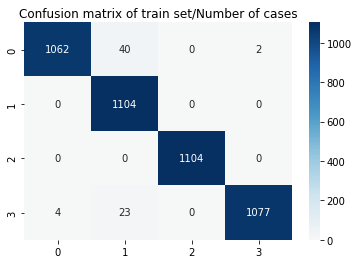

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_train100= confusion_matrix(y_train,y_pred100_train)
sns.heatmap(cm_train100,annot=True,center= 0, cmap= 'RdBu',fmt='g').set_title('Confusion matrix of train set/Number of cases')

Text(0.5, 1.0, 'Confusion matrix of train set/Percentage of cases')

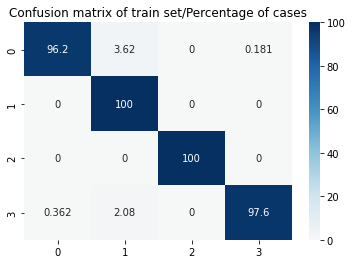

In [ ]:
cm_train100_percentage=cm_train100/(len(x_train)/4)*100
sns.heatmap(cm_train100_percentage,annot=True,center= 0, cmap= 'RdBu',fmt='.3g').set_title('Confusion matrix of train set/Percentage of cases')

From the matrix of train set, we can find the number in the dark blue means the true predictions for train data, so the accuracy of train set is (1.1e+03)*4/4473=4400/4473=0.984.

Text(0.5, 1.0, 'Confusion Matrix of Test Set/Number of Cases')

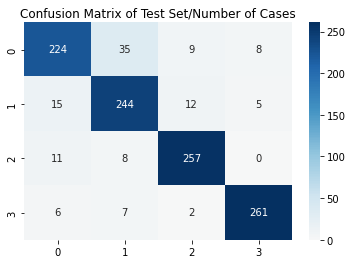

In [ ]:
cm_test100= confusion_matrix(y_test,y_pred100_test)
sns.heatmap(cm_test100,annot=True,center= 0, cmap= 'RdBu',fmt='g').set_title('Confusion Matrix of Test Set/Number of Cases')

Text(0.5, 1.0, 'Confusion Matrix of Test Set/Percentage of Cases')

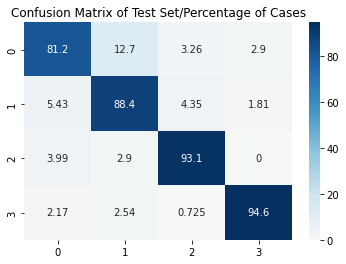

In [ ]:
cm_test100_percentage=cm_test100/(len(x_test)/4)*100
sns.heatmap(cm_test100_percentage,annot=True,center= 0, cmap= 'RdBu',fmt='.3g').set_title('Confusion Matrix of Test Set/Percentage of Cases')

From the matrix of train set, we can find the number in the dark blue means the true predictions for test data, so the accuracy of test set is (240+250+260+250)/1107==0.903.

#**4. Hyper parameters fine-tune**#

###**4.1 Launch again an RF classifier with ntry = sqrt (r) , but with n trees = 200 and ntrees = 300.**###

In [ ]:
# n trees=200
RF_model_200=RandomForestClassifier(n_estimators=200,max_features=8,random_state=1).fit(x_train,y_train)
y_pred200_train=RF_model_200.predict(x_train)
ACC200_train=accuracy_score(y_train,y_pred200_train)
print("Global accuracy on train set:","{:.3f}".format(ACC200_train))
y_pred200_test=RF_model_200.predict(x_test)
ACC200_test=accuracy_score(y_test,y_pred200_test)
print("Global accuracy on test set:","{:.3f}".format(ACC200_test))


Global accuracy on train set: 0.984
Global accuracy on test set: 0.902


In [ ]:
# n trees=300
RF_model_300=RandomForestClassifier(n_estimators=300,max_features=8,random_state=7).fit(x_train,y_train)
y_pred300_train=RF_model_300.predict(x_train)
ACC300_train=accuracy_score(y_train,y_pred300_train)
print("Global accuracy on train set:","{:.3f}".format(ACC300_train))
y_pred300_test=RF_model_300.predict(x_test)
ACC300_test=accuracy_score(y_test,y_pred300_test)
print("Global accuracy on test set:","{:.3f}".format(ACC300_test))

Global accuracy on train set: 0.984
Global accuracy on test set: 0.905


###**4.2 select the best number of trees = ntree * among 100, 200,300 by comparing accuracies on test set.**###

From the result of three accuracy, Margin of perfermance is sqrt[(perfermance*(1-perfermance)/testsize]. So the model_1 margin is sqrt[0.903*(1-0.903)/1104]=0.89%, model_2 margin is sqrt[0.906*(1-0.906)/1104]=0.88%,model_3 margin is sqrt[0.907*(1-0.907)/1104]=0.87%.Then we can compute the 90% confidence interval for them. CI for model_1 accuracy=0.903 +/- 1.6*0.89%=[0.889,0.917],CI for model_2 accuracy =0.906 +/- 1.6*0.88%=[0.892,0.920],CI for model_3 accuracy=0.907+/- 1.6*0.87%=[0.893,0.921]Based on the result above, we find that the accuracy of three model i not significant  when n trees=300, the global accuracy is better.

In [ ]:
k=[100,200,300]
ACCTrain=np.around([ACC100_train,ACC200_train,ACC300_train],decimals=3)
AccTest=np.around([ACC100_test,ACC200_test,ACC300_test],decimals=3)

In [ ]:
AccTest_margin=np.sqrt(AccTest*(1-AccTest)/len(x_test))
AccTest_margin_plus=AccTest+1.6*AccTest_margin
AccTest_margin_minus=AccTest-1.6*AccTest_margin

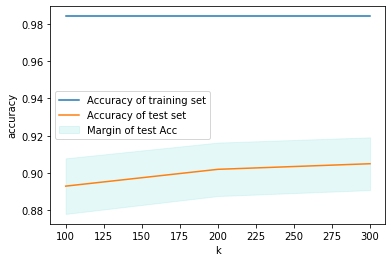

In [ ]:
#n=list(range(1,iterations+1))
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.fill_between(k,AccTest_margin_minus,AccTest_margin_plus,color='c',alpha=.1,label="Margin of test Acc")
plt.plot(k,ACCTrain,label="Accuracy of training set")
plt.plot(k,AccTest,label="Accuracy of test set")
plt.xlabel('k')
plt.ylabel('accuracy')
#plt.axis([100,300,0.86,0.99])
plt.legend(loc="center left")
plt.show()

#### Measure the run time of RF by this PCA data ###

In [ ]:
%%timeit
from sklearn.ensemble import RandomForestClassifier
RF_model_100=RandomForestClassifier(n_estimators=100,max_features=8,random_state=1).fit(x_train,y_train)

1 loop, best of 5: 2.87 s per loop


In [ ]:
%%timeit
from sklearn.ensemble import RandomForestClassifier
RF_model_200=RandomForestClassifier(n_estimators=200,max_features=8,random_state=1).fit(x_train,y_train)

1 loop, best of 5: 5.76 s per loop


In [ ]:
%%timeit
from sklearn.ensemble import RandomForestClassifier
RF_model_300=RandomForestClassifier(n_estimators=300,max_features=8,random_state=1).fit(x_train,y_train)

1 loop, best of 5: 8.63 s per loop


####Run time for PCA_data is 8.86s (ntrees=300), and compare run time of PCA_data with original data which has 400 features.####


In [ ]:
from sklearn.model_selection import train_test_split
X1_train_ori, X1_test_ori, Y1_train_ori, Y1_test_ori = train_test_split(df_CL1_n, TRUC_1, test_size=0.2,random_state=5)
X2_train_ori, X2_test_ori, Y2_train_ori, Y2_test_ori = train_test_split(df_CL2_n, TRUC_2, test_size=0.2,random_state=5)
X3_train_ori, X3_test_ori, Y3_train_ori, Y3_test_ori = train_test_split(df_CL3_n, TRUC_3, test_size=0.2,random_state=5)
X4_train_ori, X4_test_ori, Y4_train_ori, Y4_test_ori = train_test_split(df_CL4_n, TRUC_4, test_size=0.2,random_state=5)
# Grouping Training set and testing set
X_train_ori=pd.concat([X1_train_ori,X2_train_ori,X3_train_ori,X4_train_ori],axis=0).to_numpy()
X_test_ori=pd.concat([X1_test_ori,X2_test_ori,X3_test_ori,X4_test_ori],axis=0).to_numpy()
Y_train_ori=np.concatenate([Y1_train_ori,Y2_train_ori,Y3_train_ori,Y4_train_ori])
Y_test_ori=np.concatenate([Y1_test_ori,Y2_test_ori,Y3_test_ori,Y4_test_ori])


In [ ]:
from imblearn.over_sampling import SMOTE 
sm1 = SMOTE(random_state=1)
# perform SMOTE function on both train and test data
XX_sm_train, yy_sm_train = sm1.fit_resample(X_train_ori, Y_train_ori)
XX_sm_test, yy_sm_test = sm1.fit_resample(X_test_ori, Y_test_ori)
XX_sm_train = pd.DataFrame(XX_sm_train)
XX_sm_test = pd.DataFrame(XX_sm_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model_300_400feature=RandomForestClassifier(n_estimators=300,max_features=20,random_state=2).fit(XX_sm_train,yy_sm_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred300_train400feature=RF_model_300_400feature.predict(XX_sm_train)
print("Global accuracy on train set:",accuracy_score(yy_sm_train,y_pred300_train400feature))
y_pred300_test400feature=RF_model_300_400feature.predict(XX_sm_test)
print("Global accuracy on test set:",accuracy_score(yy_sm_test,y_pred300_test400feature))

Global accuracy on train set: 0.9861865942028986
Global accuracy on test set: 0.8922101449275363


In [ ]:
%%timeit
from sklearn.ensemble import RandomForestClassifier
RF_model_100_400feature=RandomForestClassifier(n_estimators=100,max_features=20,random_state=2).fit(XX_sm_train,yy_sm_train)

1 loop, best of 5: 2.51 s per loop


In [ ]:
%%timeit
from sklearn.ensemble import RandomForestClassifier
RF_model_200_400feature=RandomForestClassifier(n_estimators=200,max_features=20,random_state=2).fit(XX_sm_train,yy_sm_train)

1 loop, best of 5: 5.04 s per loop


In [ ]:
%%timeit
from sklearn.ensemble import RandomForestClassifier
RF_model_300_400feature=RandomForestClassifier(n_estimators=300,max_features=20,random_state=2).fit(XX_sm_train,yy_sm_train)

1 loop, best of 5: 7.59 s per loop


In [ ]:
from sklearn.metrics import accuracy_score
RF_model_100_400feature=RandomForestClassifier(n_estimators=100,max_features=20,random_state=2).fit(XX_sm_train,yy_sm_train)
y_pred100_test400feature=RF_model_100_400feature.predict(XX_sm_test)
print("Acc_test_n=100_features=400:",accuracy_score(yy_sm_test,y_pred100_test400feature))

Acc_test_n=100_features=400: 0.8885869565217391


In [ ]:
from sklearn.metrics import accuracy_score
RF_model_200_400feature=RandomForestClassifier(n_estimators=200,max_features=20,random_state=2).fit(XX_sm_train,yy_sm_train)
y_pred200_test400feature=RF_model_200_400feature.predict(XX_sm_test)
print("Acc_test_n=200_features=400:",accuracy_score(yy_sm_test,y_pred200_test400feature))

Acc_test_n=200_features=400: 0.8885869565217391


In [ ]:
from sklearn.metrics import accuracy_score
RF_model_300_400feature=RandomForestClassifier(n_estimators=300,max_features=20,random_state=2).fit(XX_sm_train,yy_sm_train)
y_pred300_test400feature=RF_model_300_400feature.predict(XX_sm_test)
print("Acc_test_n=300_features=400:",accuracy_score(yy_sm_test,y_pred300_test400feature))

Acc_test_n=300_features=400: 0.8922101449275363


#**5. Discussion of Importance of Features**#

###**5.1 Let RF* be the best RF classifier selected in question 4 ; For RF* compute the importances IM1 … IM10 of features Z 1 … Z10. Explain the meaning of these IMk ; Display them on a graph.**###

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf = RandomForestRegressor(n_estimators=300)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.feature_importances_

array([0.1309318 , 0.12964698, 0.05886811, 0.02628017, 0.01193927,
       0.01101543, 0.0163556 , 0.01383742, 0.0169997 , 0.01452222,
       0.02111061, 0.01396311, 0.01452273, 0.01569144, 0.01670074,
       0.00853533, 0.01256797, 0.01886748, 0.01222558, 0.01139174,
       0.01094376, 0.00866692, 0.01104609, 0.02632764, 0.01224467,
       0.01216705, 0.01233727, 0.01094207, 0.01033319, 0.01044186,
       0.00926253, 0.01174265, 0.00909941, 0.00766944, 0.00745616,
       0.00762455, 0.00855935, 0.01629386, 0.01125259, 0.0070692 ,
       0.00833599, 0.007144  , 0.01458673, 0.00753238, 0.01533745,
       0.01235123, 0.00954785, 0.0135783 , 0.00914585, 0.00842822,
       0.00694446, 0.00836223, 0.00881718, 0.00870507, 0.00816711,
       0.00721786, 0.01218138, 0.00768119, 0.00920367, 0.01055748,
       0.00872066])

In [ ]:
rf_imp=rf.feature_importances_
rf_imp_descend=np.sort(rf_imp)[::-1]
rf_imp_index=np.argsort(-rf_imp)
rf_imp_descend10=rf_imp_descend[0:10]

In [ ]:
rf_imp_descend[11:62]

array([0.01569144, 0.01533745, 0.01458673, 0.01452273, 0.01452222,
       0.01396311, 0.01383742, 0.0135783 , 0.01256797, 0.01235123,
       0.01233727, 0.01224467, 0.01222558, 0.01218138, 0.01216705,
       0.01193927, 0.01174265, 0.01139174, 0.01125259, 0.01104609,
       0.01101543, 0.01094376, 0.01094207, 0.01055748, 0.01044186,
       0.01033319, 0.00954785, 0.00926253, 0.00920367, 0.00914585,
       0.00909941, 0.00881718, 0.00872066, 0.00870507, 0.00866692,
       0.00855935, 0.00853533, 0.00842822, 0.00836223, 0.00833599,
       0.00816711, 0.00768119, 0.00766944, 0.00762455, 0.00753238,
       0.00745616, 0.00721786, 0.007144  , 0.0070692 , 0.00694446])

In [ ]:
rf_imp_descend[11:62].mean()

0.01043234648380741

In [ ]:
rf_imp_descend[11:62].std()

0.0024344191468854384

In [ ]:
rf_imp_descend.min()

0.006944463163180546

In [ ]:
rf_imp_index[0:10]

array([ 0,  1,  2, 23,  3, 10, 17,  8, 14,  6])

In [ ]:

from matplotlib import pyplot as plt

In [ ]:
rf_imp_descend[0:10]

array([0.1309318 , 0.12964698, 0.05886811, 0.02632764, 0.02628017,
       0.02111061, 0.01886748, 0.0169997 , 0.01670074, 0.0163556 ])

No handles with labels found to put in legend.


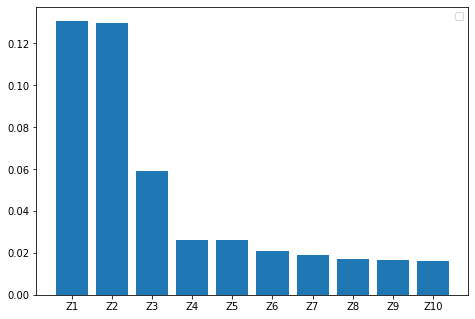

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = ['Z1', 'Z2', 'Z3', 'Z4', 'Z5','Z6','Z7','Z8','Z9','Z10']
ax.bar(features,rf_imp_descend10)
ax.legend()
plt.show()

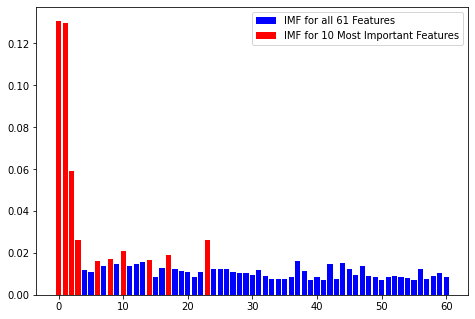

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(rf_imp_index,rf_imp_descend,label='IMF for all 61 Features',color='b')
ax.bar(rf_imp_index[0:10],rf_imp_descend10,label='IMF for 10 Most Important Features',color='r')

ax.legend()
plt.show()

The feature importance (variable importance) describes which features are relevant. Random Forest is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain. We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. 

###**5.2 Each principal component Zk is associated to an eigenvalue Lk of the 400 x 400 correlation matrix of the original 400 features. Explain what is the practical meaning of Lk /400.**###

###**5.3 Scatterplot (Lk, IMk ) for k =1…10 and interpret this plot to evaluate the potential relation between Lk and IMPk**###

In [ ]:
## Eigenvalues Eigen vector of CORR
from numpy import linalg as LA
corr_400=DATA.corr()
l,EigenVec_400=LA.eig(corr_400) # l is eigenvalues, w is eigen vector


In [ ]:
l.sum()

400.00000000000057

In [ ]:
EigenVec_400

array([[ 0.0189901 ,  0.05383136, -0.09682366, ..., -0.00164012,
         0.00030848, -0.00272318],
       [ 0.02126   ,  0.05207551, -0.09920029, ...,  0.03695056,
        -0.00685706,  0.05822282],
       [ 0.02710461,  0.04593059, -0.09197524, ..., -0.0422608 ,
         0.00106115, -0.04260787],
       ...,
       [ 0.0259442 ,  0.03459382, -0.04646808, ..., -0.04354349,
        -0.05722006,  0.13497371],
       [ 0.02020463,  0.0390528 , -0.05746356, ...,  0.04124329,
         0.0279418 , -0.07371048],
       [ 0.01879273,  0.04338843, -0.06457299, ..., -0.0187711 ,
        -0.03184559, -0.00820577]])

In [ ]:
L=np.sort(l)[::-1] # sort the eigenvalues in decreasing order
L_index=np.argsort(-l)

In [ ]:
Lk=np.sort(L)[::-1]
Lk10=Lk[0:10]

In [ ]:
Lk10

array([74.15752037, 52.63556913, 23.72067807, 16.3224149 , 14.67826644,
       13.79233191, 12.86274988,  9.17915094,  8.81317612,  7.69217615])

In [ ]:
IM=RF_model_300_400feature.feature_importances_
IMK=np.sort(IM)[::-1]
IMK10=IMK[0:10]

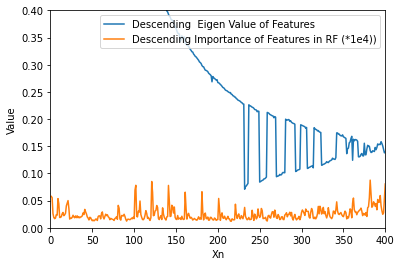

In [ ]:
import matplotlib.pyplot as plt
k=400
plt.plot(np.arange(1,k+1),np.sqrt(l[0:k]),label="Descending  Eigen Value of Features")
plt.plot(np.arange(1,k+1),IM[0:k]*10,label="Descending Importance of Features in RF (*1e4))")
plt.xlabel('Xn')
plt.ylabel('Value')
#plt.xticks([1, 2, 3, 4, 5])
plt.axis([0,400,0,0.4])
plt.legend()
plt.show()

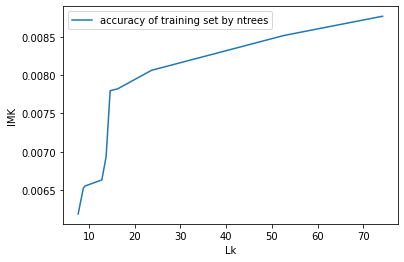

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Lk10,IMK10,label="accuracy of training set by ntrees")
plt.xlabel('Lk')
plt.ylabel('IMK')
plt.legend()
plt.show()

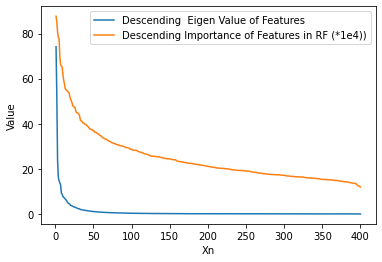

In [ ]:
import matplotlib.pyplot as plt
k=400
plt.plot(np.arange(1,k+1),Lk[0:k],label="Descending  Eigen Value of Features")
plt.plot(np.arange(1,k+1),IMK[0:k]*10000,label="Descending Importance of Features in RF (*1e4))")
plt.xlabel('Xn')
plt.ylabel('Value')
plt.legend()
plt.show()

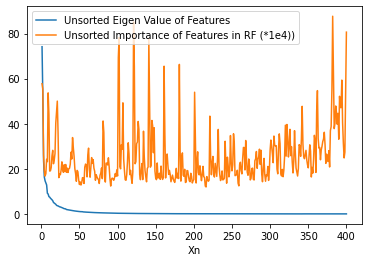

In [ ]:
import matplotlib.pyplot as plt
k=400
plt.plot(np.arange(1,k+1),l[0:k],label="Unsorted Eigen Value of Features")
plt.plot(np.arange(1,k+1),IM[0:k]*10000,label="Unsorted Importance of Features in RF (*1e4))")
plt.xlabel('Xn')
#plt.xticks([1, 2, 3, 4, 5])
#plt.axis([0,400,0,0.4])
plt.legend()
plt.show()

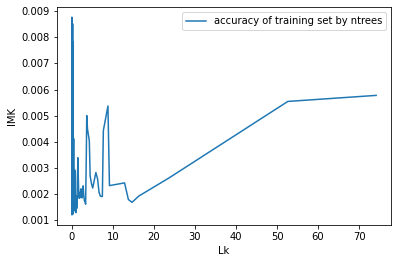

In [ ]:
import matplotlib.pyplot as plt
plt.plot(l,IM,label="accuracy of training set by ntrees")
plt.xlabel('Lk')
plt.ylabel('IMK')
plt.legend()
plt.show()

#**6. Find the worst pair of classes classification and further fine-tune by bag of RF. **#

###**6.1 Compute the 4x4 confusion matrix of RF* on the test set. Use this matrix to identify the pair of classes (CLi,CLj ) which exhibit the WORST confusion percentage.**###

Text(0.5, 1.0, 'Confusion Matrix of Test Set/Percentage of Cases')

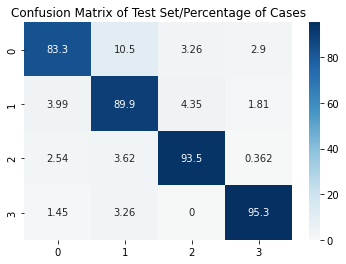

In [ ]:
cm_test300= confusion_matrix(y_test,y_pred300_test)
cm_test300_percentage=cm_test300/(len(x_test)/4)*100
sns.heatmap(cm_test300_percentage,annot=True,center= 0, cmap= 'RdBu',fmt='.3g').set_title('Confusion Matrix of Test Set/Percentage of Cases')

According to the confusion matrix, (CL1,CL2) exhibit the worst percentage of corrected prediction

Text(0.5, 1.0, 'Confusion Matrix of Test Set/Percentage of Cases')

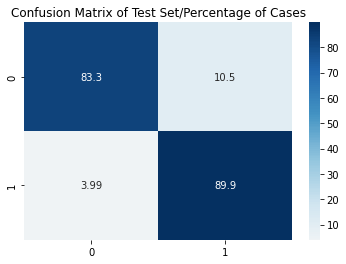

In [ ]:
sns.heatmap(cm_test300_percentage[0:2,0:2],annot=True,center= 0, cmap= 'RdBu',fmt='.3g').set_title('Confusion Matrix of Test Set/Percentage of Cases')

###**6.2 Train a newRF classifier with ntry sqrt (r) and numbers of trees = ntree * to classify CLi versus CLj. Compute the test set accuracy and 2x2 confusion matrix for newRF Compare to the ( CLi,CLj ) results obtained in 6.1.**###

In [ ]:
#Select CL1 and CL2 data and concatenat to new train and test data. 
x12_train=np.concatenate((x1_train,x2_train),axis=0)
x12_test=np.concatenate((x1_test,x2_test),axis=0)
y12_train=np.concatenate((y1_train,y2_train),axis=0)
y12_test=np.concatenate((y1_test,y2_test),axis=0)

In [ ]:
#Train Random Forest classifier which targeting on CL1 and CL2. 
# n trees=300
RF_CL12_model_300=RandomForestClassifier(n_estimators=300,max_features=8,random_state=1).fit(x12_train,y12_train)
y12_pred_train=RF_CL12_model_300.predict(x12_train)
ACC_CL12_train=np.around(accuracy_score(y12_train,y12_pred_train),decimals=3)
print("Accuracy on train set:",ACC_CL12_train)
y12_pred_test=RF_CL12_model_300.predict(x12_test)
ACC_CL12_test=np.around(accuracy_score(y12_test,y12_pred_test),decimals=3)
print("Accuracy on test set:",ACC_CL12_test)

Accuracy on train set: 0.982
Accuracy on test set: 0.913


Text(0.5, 1.0, 'CM of CL1&CL2 Test Data')

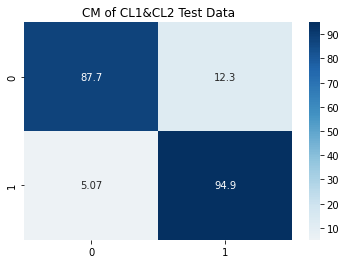

In [ ]:
cm_ACC_CL12_test= confusion_matrix(y12_test,y12_pred_test)/(len(y12_test)/2)*100
sns.heatmap(cm_ACC_CL12_test,annot=True,center= 0, cmap= 'RdBu',fmt='.3g').set_title('CM of CL1&CL2 Test Data')

###**6.3 Run bag of RF on the 1v1 RF classifiers**###

In [ ]:
x_train.shape

(4416, 61)

In [ ]:
y_train.shape

(4416,)

In [ ]:
x_train1, x_train_drop, y_train1, y_train_drop = train_test_split(x_train, y_train, test_size=0.2,random_state=11)
x_train2, x_train_drop, y_train2, y_train_drop = train_test_split(x_train, y_train, test_size=0.2,random_state=12)
x_train3, x_train_drop, y_train3, y_train_drop = train_test_split(x_train, y_train, test_size=0.2,random_state=13)
x_train4, x_train_drop, y_train4, y_train_drop = train_test_split(x_train, y_train, test_size=0.2,random_state=14)
x_train5, x_train_drop, y_train5, y_train_drop = train_test_split(x_train, y_train, test_size=0.2,random_state=15)

In [ ]:
print(x_train1.shape,x_train2.shape,x_train3.shape,x_train4.shape,x_train5.shape)

(3532, 61) (3532, 61) (3532, 61) (3532, 61) (3532, 61)


In [ ]:
print(y_train1.shape,y_train2.shape,y_train3.shape,y_train4.shape,y_train5.shape)

(3532,) (3532,) (3532,) (3532,) (3532,)


In [ ]:
print(x_test.shape,y_test.shape)

(1104, 61) (1104,)


In [ ]:
# n trees=300
RFtr1=RandomForestClassifier(n_estimators=300,max_features=8,random_state=0).fit(x_train1,y_train1)
RFtr2=RandomForestClassifier(n_estimators=300,max_features=8,random_state=1).fit(x_train2,y_train2)
RFtr3=RandomForestClassifier(n_estimators=300,max_features=8,random_state=2).fit(x_train3,y_train3)
RFtr4=RandomForestClassifier(n_estimators=300,max_features=8,random_state=3).fit(x_train4,y_train4)
RFtr5=RandomForestClassifier(n_estimators=300,max_features=8,random_state=4).fit(x_train5,y_train5)

In [ ]:
y_predRFtr1=RFtr1.predict(x_test)
y_predRFtr2=RFtr2.predict(x_test)
y_predRFtr3=RFtr3.predict(x_test)
y_predRFtr4=RFtr4.predict(x_test)
y_predRFtr5=RFtr5.predict(x_test)

In [ ]:
ACCRFtr1_test=accuracy_score(y_test,y_predRFtr1)
ACCRFtr2_test=accuracy_score(y_test,y_predRFtr2)
ACCRFtr3_test=accuracy_score(y_test,y_predRFtr3)
ACCRFtr4_test=accuracy_score(y_test,y_predRFtr4)
ACCRFtr5_test=accuracy_score(y_test,y_predRFtr5)

In [ ]:
print("Accuracy by RFtr1 on test set:","{:.3f}".format(ACCRFtr1_test))
print("Accuracy by RFtr2 on test set:","{:.3f}".format(ACCRFtr2_test))
print("Accuracy by RFtr3 on test set:","{:.3f}".format(ACCRFtr3_test))
print("Accuracy by RFtr4 on test set:","{:.3f}".format(ACCRFtr4_test))
print("Accuracy by RFtr5 on test set:","{:.3f}".format(ACCRFtr5_test))

Accuracy by RFtr1 on test set: 0.889
Accuracy by RFtr2 on test set: 0.884
Accuracy by RFtr3 on test set: 0.889
Accuracy by RFtr4 on test set: 0.877
Accuracy by RFtr5 on test set: 0.879


In [ ]:
ACCRFtr_test=np.array((ACCRFtr1_test,ACCRFtr2_test,ACCRFtr3_test,ACCRFtr4_test,ACCRFtr5_test))
ACCRFtr_margin=np.sqrt(ACCRFtr_test*(1-ACCRFtr_test)/len(y_test))
ACCRFtr_margin_plus=ACCRFtr_test+1.6*ACCRFtr_margin
ACCRFtr_margin_minus=ACCRFtr_test-1.6*ACCRFtr_margin

In [ ]:
np.around(ACCRFtr_margin_plus,decimals=3)

array([0.904, 0.899, 0.904, 0.893, 0.894])

In [ ]:
np.around(ACCRFtr_margin_minus,decimals=3)

array([0.873, 0.869, 0.873, 0.861, 0.863])

In [ ]:
#get the majority answer among these 5 RF classifiers
from scipy import stats
a=len(y_predRFtr1)
y_predRT_fusion=[0]*a
for i in range (a):
  y_predRT_fusion[i]=stats.mode([y_predRFtr1[i],y_predRFtr2[i],y_predRFtr3[i],y_predRFtr4[i],y_predRFtr5[i]])[0][0]


In [ ]:
ACC_RFtrfusion_test=accuracy_score(y_test,y_predRT_fusion)
print("{:.3f}".format(ACC_RFtrfusion_test))

0.904


In [ ]:
ACC_RFtrfusion_test_margin=np.sqrt(ACC_RFtrfusion_test*(1-ACC_RFtrfusion_test)/len(y_test))
ACC_RFtrfusion_test_plus=ACC_RFtrfusion_test+1.6*ACC_RFtrfusion_test_margin
ACC_RFtrfusion_test_minus=ACC_RFtrfusion_test-1.6*ACC_RFtrfusion_test_margin

In [ ]:
print("the 90% confidence interval of Acc_RFtrfusion_test is:",
      "{:.3f}".format(ACC_RFtrfusion_test_plus),"{:.3f}".format(ACC_RFtrfusion_test_minus))

the 90% confidence interval of Acc_RFtrfusion_test is: 0.918 0.890


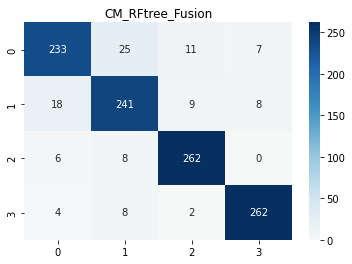

In [ ]:
cm_RFtrfusion_test= confusion_matrix(y_test,y_predRT_fusion)
fig_RFtrfusion_test=sns.heatmap(cm_RFtrfusion_test,annot=True,center= 0, cmap= 'RdBu',fmt='g').set_title('CM_RFtree_Fusion')

In [ ]:
cm_RT1=confusion_matrix(y_test,y_predRFtr1)
cm_RT2=confusion_matrix(y_test,y_predRFtr2)
cm_RT3=confusion_matrix(y_test,y_predRFtr3)
cm_RT4=confusion_matrix(y_test,y_predRFtr4)
cm_RT5=confusion_matrix(y_test,y_predRFtr5)

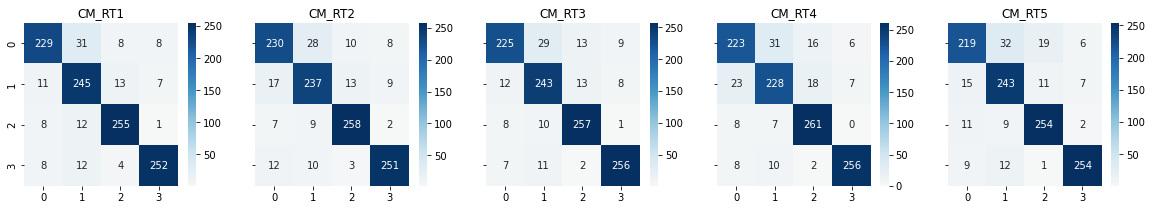

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 3), sharey=True)
fig_RT1=sns.heatmap(cm_RT1,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[0]).set_title('CM_RT1')
fig_RT2=sns.heatmap(cm_RT2,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[1]).set_title('CM_RT2')
fig_RT3=sns.heatmap(cm_RT3,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[2]).set_title('CM_RT3')
fig_RT4=sns.heatmap(cm_RT4,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[3]).set_title('CM_RT4')
fig_RT5=sns.heatmap(cm_RT5,annot=True,center= 0, cmap= 'RdBu',fmt='g',ax=axes[4]).set_title('CM_RT5')

In [ ]:
len(y_predRT_fusion)

1104

In [ ]:
x_test.shape

(1104, 61)

Since CL12 has residual large misclassification, a further fine-tune can be specifically targeted on CL12.

In [ ]:
#combine test data x, prediced y and true y
test_data_fusion=pd.DataFrame(x_test)
test_data_fusion['y_predRT_fusion']=y_predRT_fusion
test_data_fusion['y_true']=y_test

In [ ]:
#select CL1 and CL2 from test data frame
test_data_fusion_class12=test_data_fusion[(test_data_fusion["y_predRT_fusion"]==1)|(test_data_fusion["y_predRT_fusion"]==2)]
test_data_fusion_class34=test_data_fusion[(test_data_fusion["y_predRT_fusion"]==3)|(test_data_fusion["y_predRT_fusion"]==4)]

In [ ]:
#generate test data x for class 1 and 2
x_test_data_fusion_class12 = test_data_fusion_class12.iloc[:,0:61]
#generate predict y for test data of class 3 and 4
y_pred_test_data_fusion_class34=test_data_fusion_class34.iloc[:,61]
#generate true y for test data of class 1 and 2
y_true_test_class12=test_data_fusion_class12.iloc[:,62]
#generate true y for test data of class 3 and 4
y_true_test_class34=test_data_fusion_class34.iloc[:,62]

In [ ]:
#call pre-trained classifier 'RF_CL12_model_300' by section6.1 to predict y_test_fusion of CL12
y_pred_test_data_fusion_class12=RF_CL12_model_300.predict(x_test_data_fusion_class12)

In [ ]:
# generate y_true for test data
y_true_test=np.concatenate([y_true_test_class12,y_true_test_class34])
# generate y_predict for test data by combine fusion of class34 and fusion_finetune of class12
y_pred_test_fusion_finetune=np.concatenate([y_pred_test_data_fusion_class12,y_pred_test_data_fusion_class34])

In [ ]:
#calculate accuracy for finetune predicted y
ACC_pred_test_fusion_finetune=accuracy_score(y_true_test,y_pred_test_fusion_finetune)
print("{:.3f}".format(ACC_pred_test_fusion_finetune))

0.907


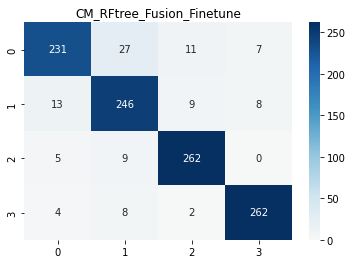

In [ ]:
#generate confusion matrix for fusion_finetune classification
cm_test_RFtrfusion_finetune= confusion_matrix(y_true_test,y_pred_test_fusion_finetune)
fig_test_RFtrfusion_finetune=sns.heatmap(cm_test_RFtrfusion_finetune,
                                         annot=True,center= 0, cmap= 'RdBu',fmt='g').set_title('CM_RFtree_Fusion_Finetune')